**Title:** Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.<br>
**Task:** <li>As a security/defense analyst, try to find out the hot zone of terrorism.</li>
    <li>What all security issues and insights you can derive by EDA?</li>

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\JAY\Desktop\globalterrorismdb_0718dist.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


**Displaying column names whose null values are less than 25%**

In [4]:
df1 = df.loc[:, df.isnull().mean() < 0.25]

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

**For hot zone of terrorism, we may not require some attributes**

In [6]:
df1.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   Year              181691 non-null  int64  
 2   Month             181691 non-null  int64  
 3   day               181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   Country           181691 non-null  object 
 7   region            181691 non-null  int64  
 8   Region            181691 non-null  object 
 9   State             181270 non-null  object 
 10  City              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [8]:
df2 = df1[['Year', 'Month', 'day', 'Country', 'Region', 'State', 'City',
       'latitude', 'longitude', 'Attacktype', 'Targettype', 'target1', 'Group',
       'Weapon', 'kill', 'Wound']]
df2.head()

,Year,Month,day,Country,Region,State,City,latitude,longitude,Attacktype,Targettype,target1,Group,Weapon,kill,Wound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Employee,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,Incendiary,NaN,NaN


In [9]:
print("Initial: ",df2.shape)
df2['Casualties'] = df2['kill'] + df2['Wound']
print("Later: ",df2.shape)

Initial:  (181691, 16)
Later:  (181691, 17)


<ipython-input-9-958b4df5e015>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Casualties'] = df2['kill'] + df2['Wound']


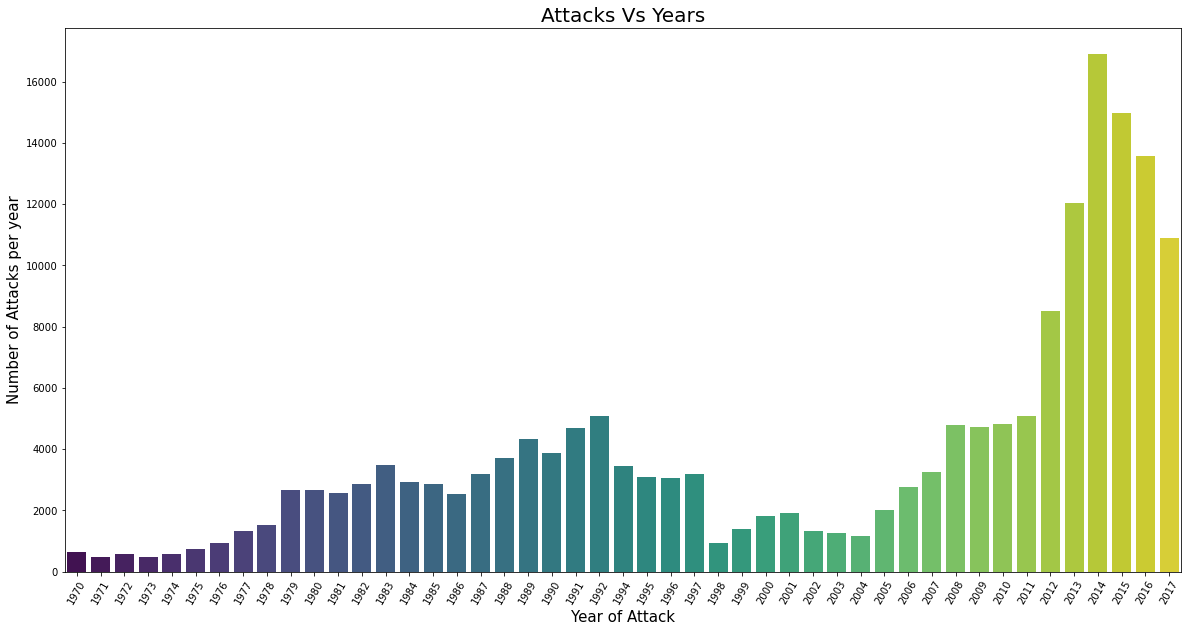

In [10]:
plt.figure(figsize = (20,10))
sns.barplot(x = df2['Year'].unique(),
            y = df2['Year'].value_counts(dropna = False).sort_index(),
            palette = "viridis")
plt.xticks(rotation = 60)
plt.xlabel('Year of Attack',fontsize=15)
plt.ylabel('Number of Attacks per year',fontsize=15)
plt.title('Attacks Vs Years',fontsize=20)
plt.show()

In [11]:
df2['Attacktype'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

In [12]:
df2['Attacktype'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

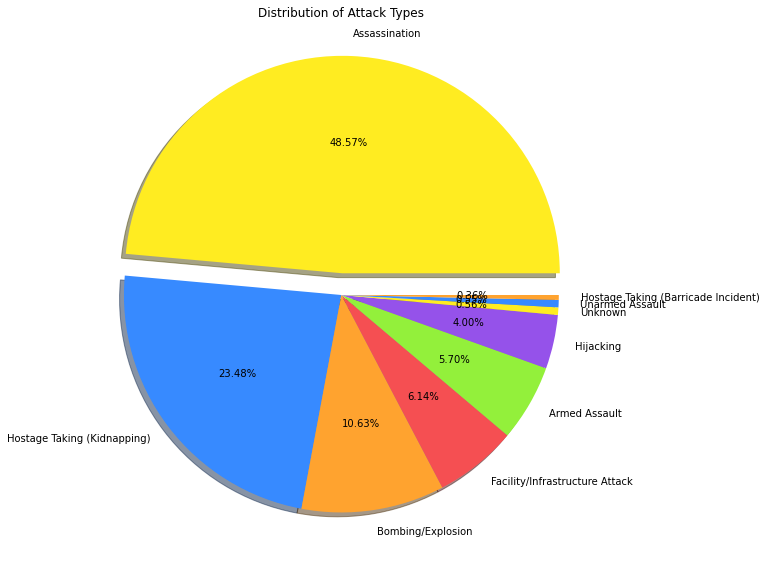

In [13]:
slices = [88255, 42669, 19312, 11158, 10356, 7276, 1015, 991, 659]
plt.figure(figsize = (20,10))
plt.pie(slices,
        labels = df2['Attacktype'].unique(),
        colors = ['#FFEC21', '#378AFF', '#FFA32F', '#F54F52', '#93F03B', '#9552EA'],
        autopct='%1.2f%%',
        shadow = True,
        explode = (.1, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title("Distribution of Attack Types")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


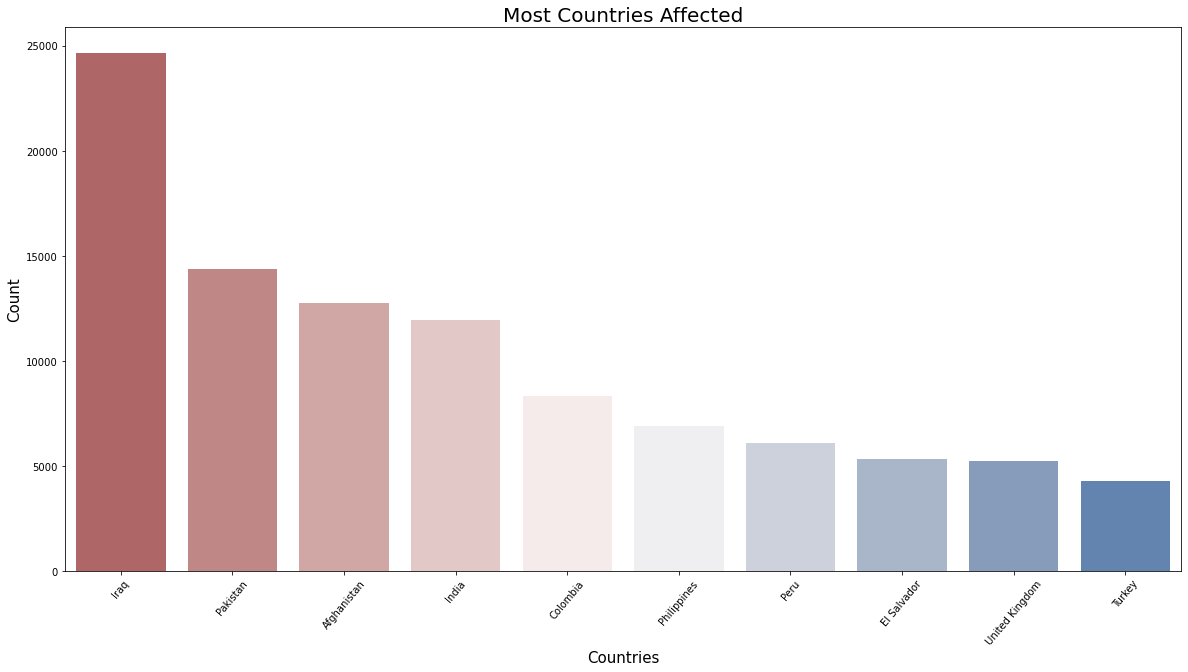

In [14]:
plt.subplots(figsize=(20,10))
sns.barplot(df2['Country'].
            value_counts()[:10].index,
            df2['Country'].value_counts()[:10].values,
            palette='vlag_r')
plt.title('Most Countries Affected', fontsize=20)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation = 50)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


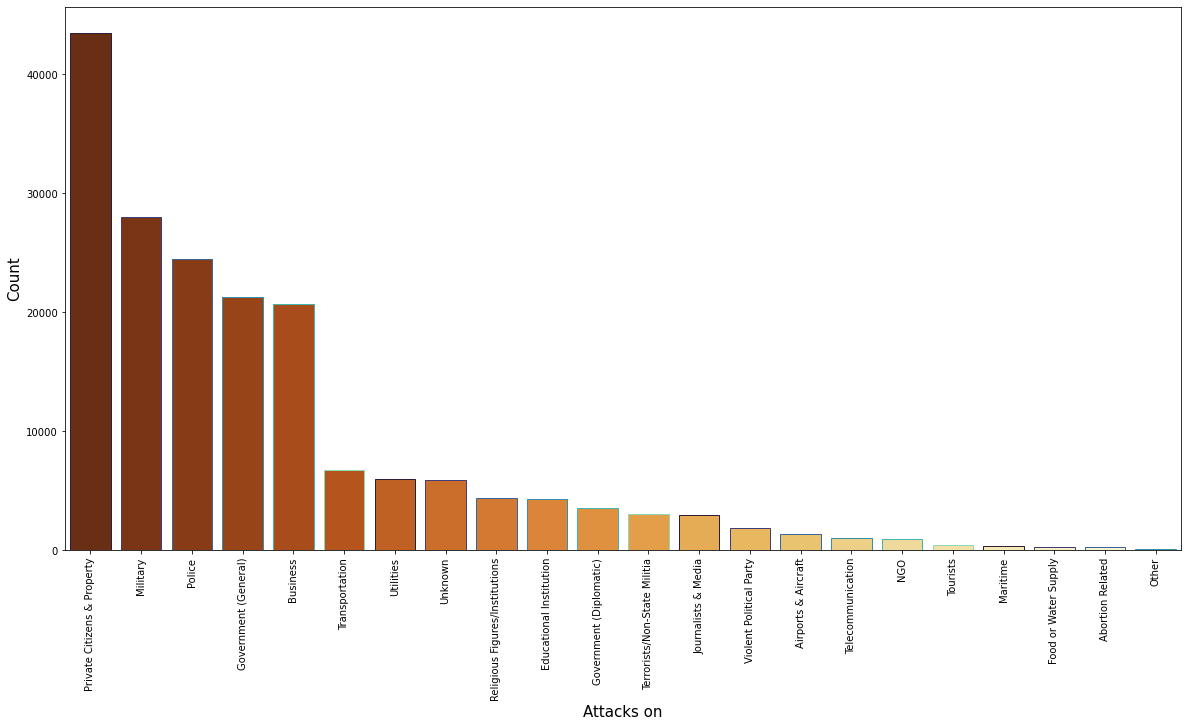

In [15]:
plt.subplots(figsize=(20,10))
sns.countplot(df2["Targettype"],
              order=df2['Targettype'].value_counts().index,
              palette="YlOrBr_r",
              edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacks on",fontsize=15)
plt.ylabel("Count",fontsize=15)
# plt.title("Place of Attack",fontsize=20)
plt.show()

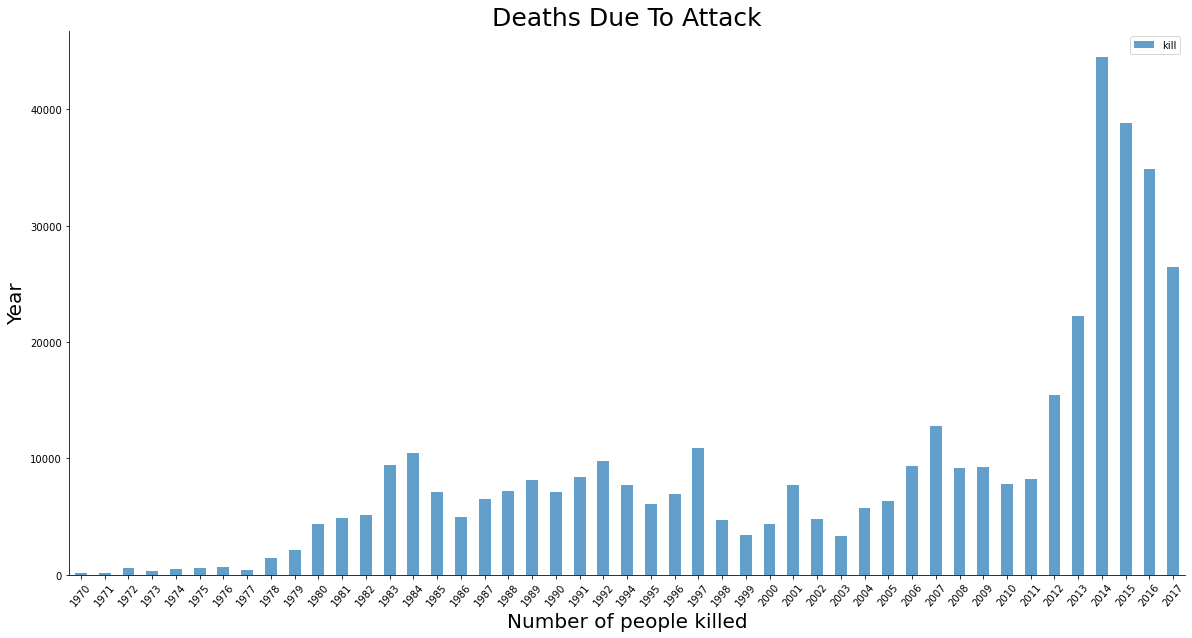

In [16]:
df3 = df2[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df3.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("Deaths Due To Attack",fontsize=25)
plt.xlabel("Number of people killed",fontsize=20)
plt.ylabel("Year",fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

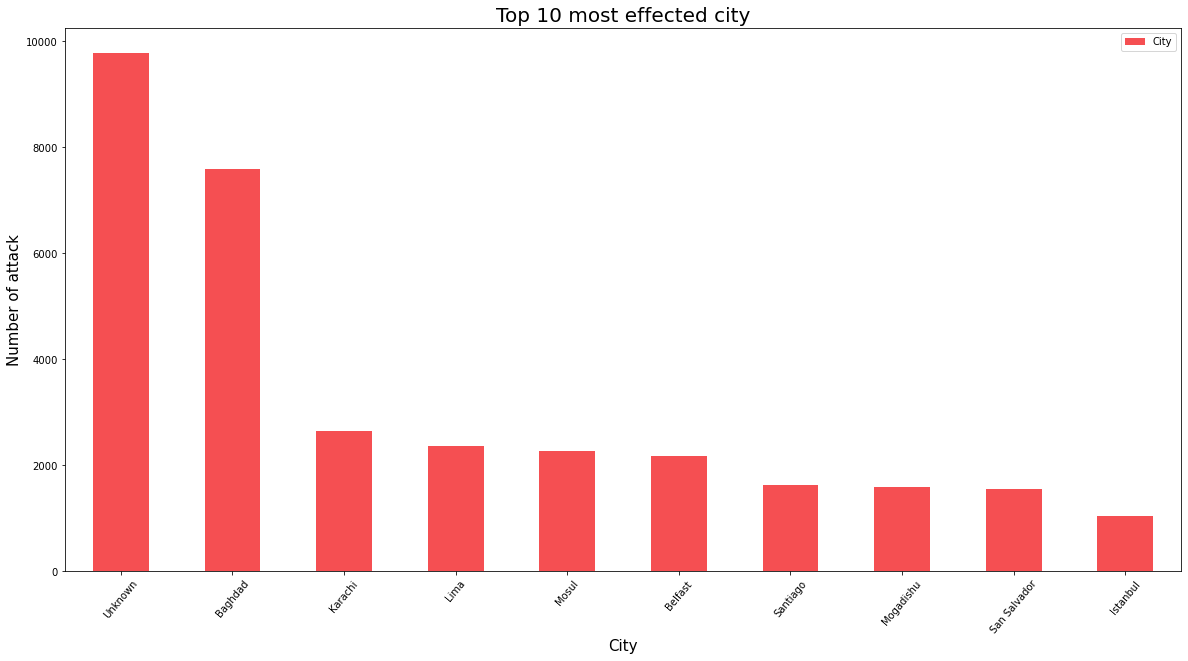

In [17]:
df2['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='#F54F52')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

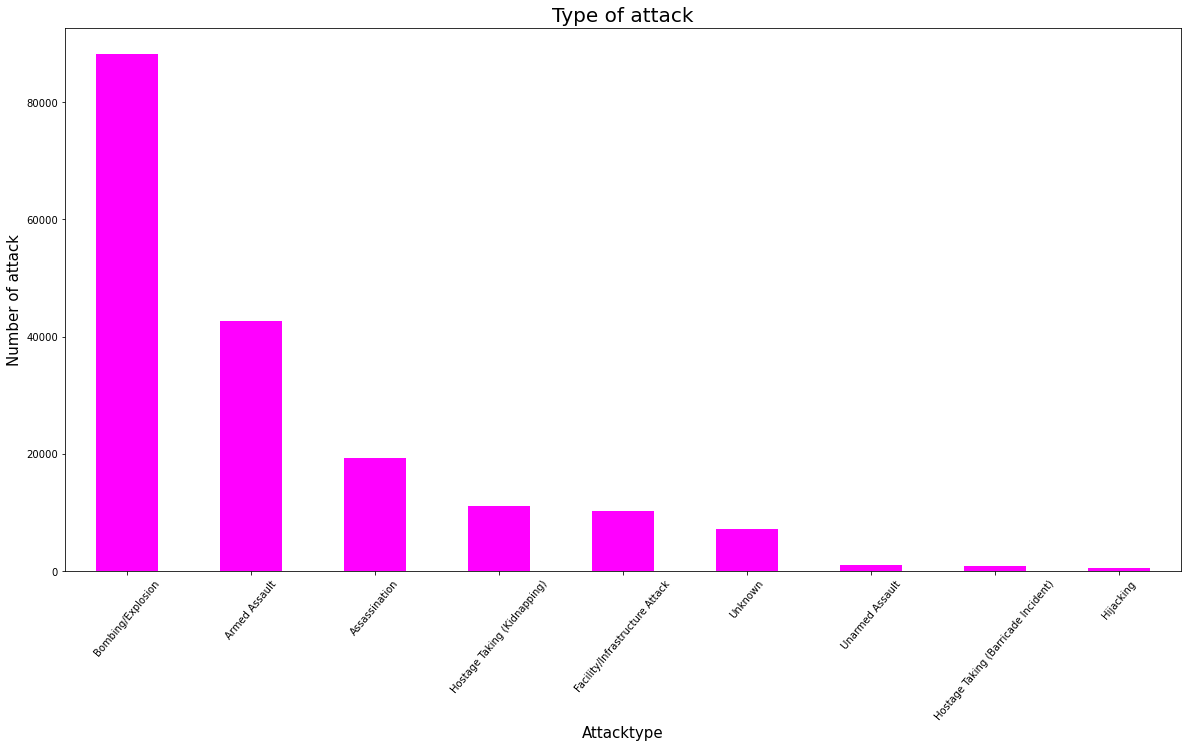

In [18]:
df2['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Type of attack",fontsize=20)
plt.show()

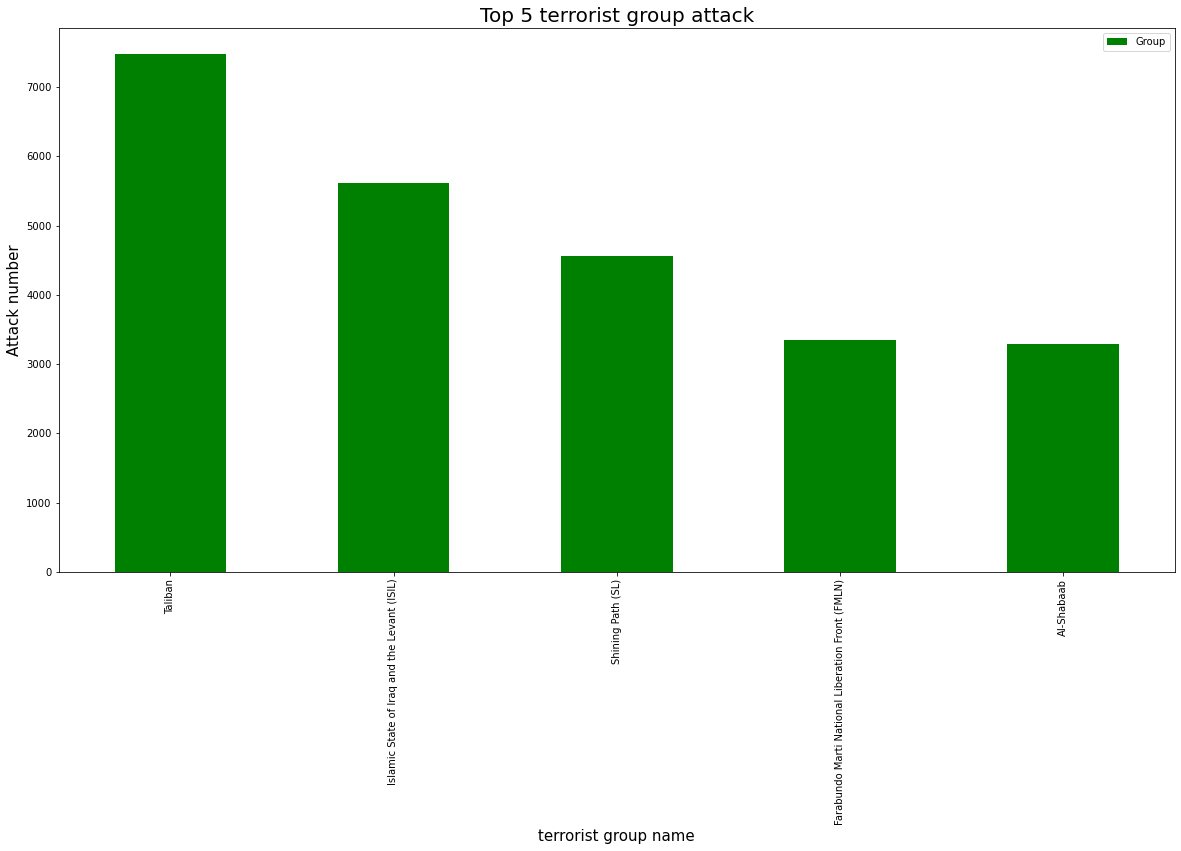

In [19]:
df2['Group'].value_counts().to_frame().drop('Unknown').head(5).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 5 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

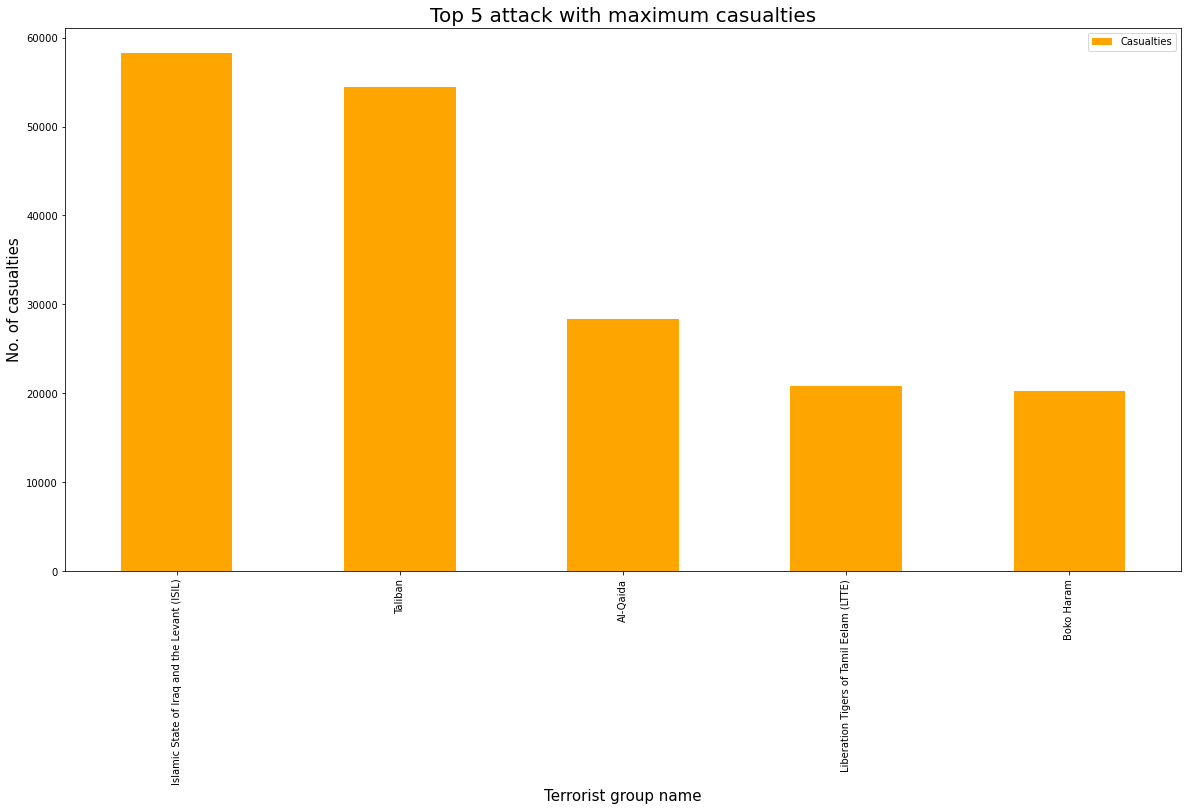

In [20]:
df2[['Group','Casualties']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Casualties',ascending=False).head(5).plot(kind='bar',color='orange',figsize=(20,10))
plt.title("Top 5 attack with maximum casualties",fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("No. of casualties",fontsize=15)
plt.show()

**Conclusion:**
1. Year with maximum attacks: 2014
2. Common attack type: Assassination
3. Most affected country: Iraq
4. Maximum damage caused to: private citizen and property
5. Year with maximum deaths: 2014
6. Most affected city: Unknown
7. Favourable type of attack: Explosion/bombing
8. Terrorist group with maximum casualties: ISIL